# Illustrative example of VMCM and CoCoSo methods

## Import necessary packages

Import of the necessary Python packages necessary for running codes provided in examples.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

Import the necessary Python modules from `pyrepo-mcda` package.

In [2]:
from pyrepo_mcda.additions import rank_preferences
from pyrepo_mcda.mcda_methods import VMCM, TOPSIS, EDAS, VIKOR, PROMETHEE_II, PROSA_C, COCOSO
from pyrepo_mcda import normalizations as norms
from pyrepo_mcda import correlations as corrs

Supporting function for running provided examples including visualization. Here is function called `draw_heatmap` for displaying heat map with rankings correlations. You can copy and customize its code to your case. Class `Create_dictionary` helps create a correlation matrix to show rankings correlations.

In [3]:
# heat maps with correlations
def draw_heatmap(df_new_heatmap, title):
    """
    Visualization method to display heatmap with correlations of compared rankings generated using different methods
    
    Parameters
    ----------
        data : DataFrame
            DataFrame with correlation values between compared rankings
        
    Examples
    ---------
    >>> draw_heatmap(df_new_heatmap)
    """
    
    plt.figure(figsize = (11, 5))
    sns.set(font_scale = 1.2)
    heatmap = sns.heatmap(df_new_heatmap, annot=True, fmt=".4f", cmap="YlGnBu",
                          linewidth=0.5, linecolor='w')
    plt.yticks(va="center")
    plt.yticks(va="center")
    plt.xlabel('MCDA methods')
    plt.ylabel('MCDA methods')
    plt.title('Correlation coefficient: ' + title)
    plt.tight_layout()
    plt.savefig('./results_update2/heatmap.pdf')
    plt.savefig('./results_update2/heatmap.eps')
    plt.show()

# Create dictionary class
class Create_dictionary(dict):
  
    # __init__ function
    def __init__(self):
        self = dict()
          
    # Function to add key:value
    def add(self, key, value):
        self[key] = value

## Using the VMCM method

### Select criteria assessment, define criteria types, load the data of alternatives

An example decision problem involves selecting the best Waste-to-Energy system for the City of Johannesburg in South Africa based on Alao, M. A., Popoola, O. M., & Ayodele, T. R. (2021). Selection of waste-to-energy technology for distributed generation using IDOCRIW-Weighted TOPSIS method: A case study of the City of Johannesburg, South Africa. Renewable Energy, 178, 162-183. DOI: https://doi.org/10.1016/j.renene.2021.06.031

The problem considers five alternatives (A1-A5) evaluated against 14 criteria (C1-C14). The last row, named Type, denotes criteria types, where 1 represents profit criteria with the aim of maximization, and -1 defines cost criteria with the objective of minimization.

In [4]:
# Load data including decision matrix and criteria types
data = pd.read_csv('dataset_waste.csv', index_col = 'Alternative')

In [5]:
data

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
Alternative,,,,,,,,,,,,,,
A1 (AD),682.56,20,8.4167,8.4167,370.2000,17.8110,127.270,7.55,0.0951,20.092,0.003483,8.4167,8.1467,8.4167
A2 (LFGR),69.10,10,8.4167,8.4167,16.4170,4.1029,110.060,4.62,0.1156,148.410,0.103280,9.6667,2.9167,1.4167
A3 (INC),882.43,26,9.6667,1.4167,733.1100,2.3826,11.565,6.96,0.1005,1169.800,366.600000,1.4167,0.4167,1.4167
A4 (GAS),2842.20,30,1.4167,1.4167,1393.5000,81.0300,323.950,10.99,0.0626,288.620,0.288200,1.4167,1.4167,1.4167
A5 (PYR),434.12,15,1.4167,1.4167,7.0315,18.3700,247.490,5.99,0.0501,358.560,16.100000,1.4167,1.4167,1.4167
Type,1.00,1,1.0000,1.0000,-1.0000,-1.0000,1.000,-1.00,-1.0000,-1.000,-1.000000,-1.0000,1.0000,1.0000


Prepare decision matrix and criteria types as `numpy.ndarray` types. Then prepare dataframe for VMCM results.

In [6]:
df_data = data.iloc[:len(data) - 1, :]
types = data.iloc[len(data) - 1, :].to_numpy()
matrix = df_data.to_numpy()

# Prepare dataframe for VMCM results
df_vmcm = pd.DataFrame(index=df_data.index)

### Initialize the VMCM object

Initialize the VMCM object. Then, determine criteria weights using the function `_weighting` for criteria weighting available in the VMCM class.

In [7]:
# Initialize the VMCM method object
vmcm = VMCM()

### Eliminate variables

In [8]:
# Print the criteria to be eliminated
vmcm._elimination(matrix)

Elimination of variables stage (significance coefficient of features):
C1 = 1.1030
C2 = 0.3997
C3 = 0.6979
C4 = 0.9093
C5 = 1.1510
C6 = 1.3071
C7 = 0.7468
C8 = 0.3296
C9 = 0.3229
C10 = 1.1362
C11 = 2.1176
C12 = 0.9402
C13 = 1.0779
C14 = 1.1114
Criteria to eliminate:
None


### Assign weights to criteria assessment

In [9]:
# Determine criteria weights
weights = vmcm._weighting(matrix)

Print weights calculated for criteria assessment.

In [10]:
weights

array([0.08261625, 0.02994112, 0.05227225, 0.06810541, 0.08621138,
       0.09790768, 0.05593705, 0.02468653, 0.02418794, 0.08510636,
       0.15861659, 0.07042509, 0.08073944, 0.08324691])

### Determine pattern and anti-pattern

Determine and display criteria that should be eliminated from the model because of the low value of the significance coefficient (between 0 and 0.1).

Determine pattern and anti-pattern using function `_pattern_determination` provided in the VMCM class.

In [11]:
# Determine pattern and anti-pattern
pattern, antipattern = vmcm._pattern_determination(matrix, types)

In [12]:
pattern

array([-0.0919959 ,  0.71829724,  0.62283181,  1.09544512, -0.84052497,
       -0.63815391,  0.68086454, -0.51759361, -0.81014919, -0.55117529,
       -0.47158638, -0.72624194,  0.01749959, -0.4472136 ])

In [13]:
antipattern

array([-0.50586297, -0.64399063, -1.08690257, -0.73029674,  0.39482264,
       -0.19696234, -0.44078313,  0.1378009 ,  0.5741905 , -0.08541002,
       -0.3729944 ,  0.94054284, -0.4686001 , -0.4472136 ])

### Calculate the synthetic measure values for evaluated alternatives

Calculate synthetic measure values for each evaluated alternative. It is required for ranking alternatives and assigning classes to them. An alternative that got the highest synthetic measure value is considered the best evaluated option.

In [14]:
# Calculate value of the synthetic measure for each object
pref = vmcm(matrix, weights, types, pattern, antipattern)

In [15]:
pref

array([0.58312231, 0.41569885, 0.38703968, 0.41406911, 0.50804565])

### Classify evaluated objects

Assign classes to evaluated alternatives based on synthetic measure values.

In [16]:
# Classify evaluated objects according to synthetic measure values
classes = vmcm._classification(pref)

In [17]:
classes

array([1., 3., 3., 3., 2.])

### Rank evaluated objects

In [18]:
# Rank evaluated objects according to synthetic measure values
rank = rank_preferences(pref, reverse = True)

In [19]:
rank

array([1, 3, 5, 4, 2])

In [20]:
df_vmcm['Synthetic measure'] = pref
df_vmcm['Class'] = classes
df_vmcm['Rank'] = rank

Display results obtained using the VMCM method, including synthetic measure values, classes, and ranking.

In [21]:
df_vmcm

,Synthetic measure,Class,Rank
Alternative,,,
A1 (AD),0.583122,1.0,1
A2 (LFGR),0.415699,3.0,3
A3 (INC),0.387040,3.0,5
A4 (GAS),0.414069,3.0,4
A5 (PYR),0.508046,2.0,2


## Comparative analysis of VMCM with other MCDA methods
Compare VMCM ranking with rankings provided by other MCDA methods.

### Create MCDA rankings to compare them with VMCM ranking.

In [22]:
# COMAPRATIVE ANALYSIS
df_comparative = pd.DataFrame(index=df_data.index)
df_comparative['VMCM'] = rank

topsis = TOPSIS(normalization_method=norms.minmax_normalization)
pref = topsis(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
df_comparative['TOPSIS'] = rank

vikor = VIKOR()
pref = vikor(matrix, weights, types)
rank = rank_preferences(pref, reverse = False)
df_comparative['VIKOR'] = rank

edas = EDAS()
pref = edas(matrix, weights, types)
rank = rank_preferences(pref, reverse = True)
df_comparative['EDAS'] = rank

promethee_II = PROMETHEE_II()
preference_functions = [promethee_II._linear_function for pf in range(len(weights))]
pref = promethee_II(matrix, weights, types, preference_functions)
rank = rank_preferences(pref, reverse=True)
df_comparative['PROMETHEE II'] = rank

prosa_c = PROSA_C()
pref = prosa_c(matrix, weights, types, preference_functions)
rank = rank_preferences(pref, reverse=True)
df_comparative['PROSA C'] = rank

### Using the CoCoSo method
Evaluate objects with the CoCoSo method. Using this method is analogous to most MCDA methods available in the `pyrepo-mcda` package. During initialization of the COCOSO object, you can pass the type of normalization method and lambda parameter. The default normalization for this method is `minmax_normalization`. The default lambda parameter is equal to 0.5, and it is not necessary to pass it as a function argument if you want to set its value as 0.5.

In [23]:
cocoso = COCOSO(normalization_method=norms.minmax_normalization, lambda_param = 0.5)
pref = cocoso(matrix, weights, types)
rank = rank_preferences(pref, reverse=True)
df_comparative['COCOSO'] = rank

In [24]:
df_comparative

,VMCM,TOPSIS,VIKOR,EDAS,PROMETHEE II,PROSA C,COCOSO
Alternative,,,,,,,
A1 (AD),1,1,1,1,1,1,1
A2 (LFGR),3,2,2,2,3,3,3
A3 (INC),5,5,5,5,5,5,5
A4 (GAS),4,4,4,4,4,4,4
A5 (PYR),2,3,3,3,2,2,2


### Calculate correlations between compared rankings
Calculate correlation values between compared rankings to evaluate their convergence.

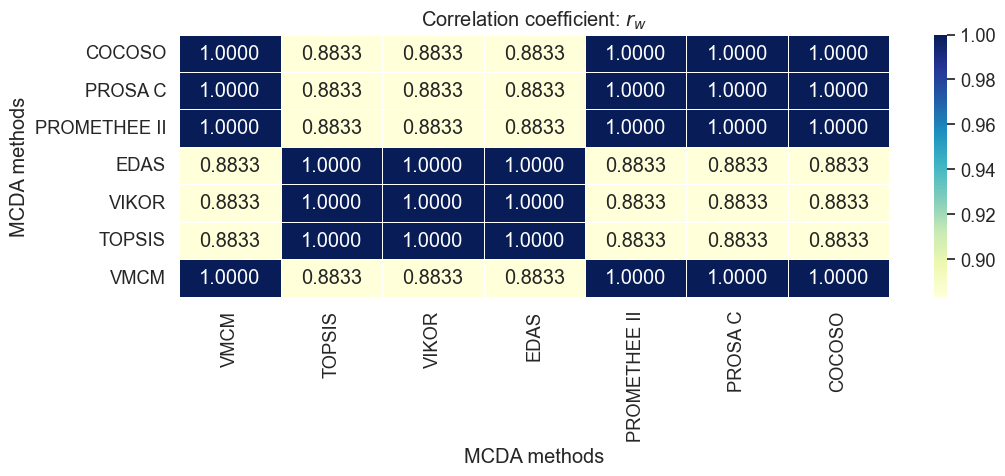

In [25]:
# Rankings correlations
results = copy.deepcopy(df_comparative)
method_types = list(results.columns)
dict_new_heatmap_rw = Create_dictionary()

for el in method_types:
    dict_new_heatmap_rw.add(el, [])

# heatmaps for correlations coefficients
for i, j in [(i, j) for i in method_types[::-1] for j in method_types]:
    dict_new_heatmap_rw[j].append(corrs.weighted_spearman(results[i], results[j]))

df_new_heatmap_rw = pd.DataFrame(dict_new_heatmap_rw, index = method_types[::-1])
df_new_heatmap_rw.columns = method_types

# correlation matrix with rw coefficient
draw_heatmap(df_new_heatmap_rw, r'$r_w$')